In [3]:
# Data Wrangling II
# Create an “Academic performance” dataset of students and perform the following operations using 
# Python.
#   1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
#      inconsistencies, use any of the suitable techniques to deal with them.
#   2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
#      to deal with them.
#   3. Apply data transformations on at least one of the variables. The purpose of this 
#      transformation should be one of the following reasons: to change the scale for better 
#      understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
#      the skewness and convert the distribution into a normal distribution.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing as sp

In [5]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#   1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
#      inconsistencies, use any of the suitable techniques to deal with them.
data.isnull().sum() #check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# we can remove null values by dropping rows or fill null values as per features
# data1 = data.interpolate()

In [9]:
# data1.isnull().sum()

In [10]:
# Or we can drop null value rows
# data.dropna(axis=0, inplace=True)

In [11]:
# mean_val = data['raisedhands'].mean()
# data2 = data.replace(np.nan, mean_val)
# data2.isnull().sum()
# or  
#data = data['raise hands'].fillna(mean_val)

<Axes: >

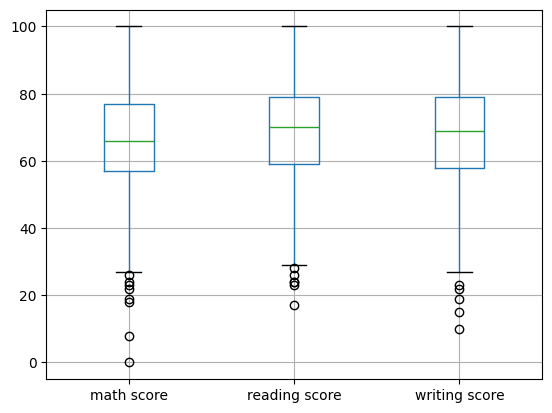

In [12]:
#   2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
#      to deal with them.
data.boxplot()

In [13]:
# Removing outliers:
# Step 1: Calculate the IQR
Q1 = data['math score'].quantile(0.25)
Q3 = data['math score'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define Lower and Upper Bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 3: Identify Outliers
outliers = data[(data['math score'] < lower_bound) | (data['math score'] > upper_bound)]

# Step 4: Remove Outliers
clean_data = data[~((data['math score'] < lower_bound) | (data['math score'] > upper_bound))]

In [14]:
clean_data.boxplot()

<Axes: >

In [15]:
#   3. Apply data transformations on at least one of the variables. The purpose of this 
#      transformation should be one of the following reasons: to change the scale for better 
#      understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
#      the skewness and convert the distribution into a normal distribution.

In [27]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Load the dataset
data = pd.read_csv('StudentsPerformance.csv')

# Choose a numerical variable to transform (e.g., 'math score')
variable_to_transform = 'math score'

# Apply Min-Max scaling
minmax_scaler = MinMaxScaler()
data['minmax_scaled_' + variable_to_transform] = minmax_scaler.fit_transform(data[[variable_to_transform]])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,minmax_scaled_math score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.72
1,female,group C,some college,standard,completed,69,90,88,0.69
2,female,group B,master's degree,standard,none,90,95,93,0.90
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.47
4,male,group C,some college,standard,none,76,78,75,0.76


In [26]:
# Apply Decimal scaling
decimal_scaler = RobustScaler(with_centering=False)  # Decimal scaling doesn't center the data
data['decimal_scaled_' + variable_to_transform] = decimal_scaler.fit_transform(data[[variable_to_transform]])

# Print the transformed DataFrame
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,minmax_scaled_math score,decimal_scaled_math score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.72,3.60
1,female,group C,some college,standard,completed,69,90,88,0.69,3.45
2,female,group B,master's degree,standard,none,90,95,93,0.90,4.50
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.47,2.35
4,male,group C,some college,standard,none,76,78,75,0.76,3.80
